In [1]:
import konlpy
import pandas as pd
import numpy as np 
import re

In [3]:
df = pd.read_excel("crawl/naver_cafe_ssal_contents_2019_전처리완.xlsx")
df.head(2)

,title,nickname,date,content,comments
0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...
1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9554 non-null   object
 1   nickname  9554 non-null   object
 2   date      9554 non-null   object
 3   content   9549 non-null   object
 4   comments  9036 non-null   object
dtypes: object(5)
memory usage: 373.3+ KB


In [5]:
#  Null값 제거
df = df.dropna(axis=0, how='any', subset=['content'])
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     9549 non-null   int64 
 1   title     9549 non-null   object
 2   nickname  9549 non-null   object
 3   date      9549 non-null   object
 4   content   9549 non-null   object
 5   comments  9032 non-null   object
dtypes: int64(1), object(5)
memory usage: 447.7+ KB


In [22]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣0-9]+') 
    result = hangul.sub(' ', str(text))
    return result

df['ko_text'] = df['content'].apply(lambda x : text_cleaning(x))
df.head()

,index,title,nickname,date,content,comments,ko_text
0,0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...,안녕하세요 18개월 아기 기르는 엄마입니다 이럴땐 어떻게 대처 해야할지 모르겠어서 ...
1,1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...,엄청 오랜만에 베이킹 하는거 같네용 ㅠㅠ버터도 거의바닥이었고 가루류도 없는데다가저번...
2,2,쌀에 넣어놓은 숯에 벌레가 ㅠ,연슈,2019.01.17,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데(냉장고에 도저히 자리가 안나서)혹시나 쌀...,"숯, 마늘 넣어두면 벌레 안 생기다는 말 들었는데\n생기는군요 ㅠㅠ\n전 겨울엔 락...",벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데 냉장고에 도저히 자리가 안나서 혹시나 쌀...
3,3,"67,000 원짜리 쌀 개봉했습니다!",박지마미,2019.01.14,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,악..비싸네요ㅠ\n그만큼 더 찰지고 맛있을꺼예요~ ㅎㅎ\n\n근데 저도 실한올잡아서...,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...
4,4,첨으로 베트남쌀로 밥지었어요.,조은사람,2019.01.26,처음와서는 일본품종쌀 주문해먹었었고.그담엔 한국쌀먹었는데~마트에서 한국아주머니께서 ...,저도 베트남쌀 사먹어요~~생각보다 맛있더라구요~~||그니까요. 맛도없고 냄새도날줄...,처음와서는 일본품종쌀 주문해먹었었고 그담엔 한국쌀먹었는데 마트에서 한국아주머니께서 ...


In [23]:
for i in range(len(df['ko_text'])):
    if len(df['ko_text'][i]) == 0:
        df = df.drop(index=i)

In [24]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   level_0   9549 non-null   int64 
 1   index     9549 non-null   int64 
 2   title     9549 non-null   object
 3   nickname  9549 non-null   object
 4   date      9549 non-null   object
 5   content   9549 non-null   object
 6   comments  9032 non-null   object
 7   ko_text   9549 non-null   object
dtypes: int64(2), object(6)
memory usage: 596.9+ KB


In [ ]:
del df['level_0']

In [26]:
df1 = df.iloc[:50]

In [12]:
#from konlpy.tag import Hannanum
#from collections import Counter

In [27]:
from kss import split_sentences

In [32]:
df.head()

,index,title,nickname,date,content,comments,ko_text
0,0,다운타운 **름 썩은곰팡이 쌀 ..,taniamama,2019.01.30,"안녕하세요,,18개월 아기 기르는 엄마입니다..이럴땐 어떻게 대처 해야할지 모르겠어...",요즘 여기 쌀 할인하던데 같은쌀일까요||전 2018년 10월에 풍 * 햅쌀 이라고 ...,안녕하세요 18개월 아기 기르는 엄마입니다 이럴땐 어떻게 대처 해야할지 모르겠어서 ...
1,1,"쌀마들렌 3종(모카, 허니유자, 쑥)",쪼로밋,2019.01.08,엄청 오랜만에 베이킹 하는거 같네용..ㅠㅠ버터도 거의바닥이었고..가루류도 없는데다가...,쑥 마들렌!! 완전 맛나겠다용~~~쑥향 솔솔~~😍||콩가루 묻힐까하다가 깔끔한게 나...,엄청 오랜만에 베이킹 하는거 같네용 ㅠㅠ버터도 거의바닥이었고 가루류도 없는데다가저번...
2,2,쌀에 넣어놓은 숯에 벌레가 ㅠ,연슈,2019.01.17,벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데(냉장고에 도저히 자리가 안나서)혹시나 쌀...,"숯, 마늘 넣어두면 벌레 안 생기다는 말 들었는데\n생기는군요 ㅠㅠ\n전 겨울엔 락...",벌레얘기 죄송해요 ㅠ쌀을 상온 보관 중인데 냉장고에 도저히 자리가 안나서 혹시나 쌀...
3,3,"67,000 원짜리 쌀 개봉했습니다!",박지마미,2019.01.14,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...,악..비싸네요ㅠ\n그만큼 더 찰지고 맛있을꺼예요~ ㅎㅎ\n\n근데 저도 실한올잡아서...,오늘 저희 집 쌀이 없어서 2식은 분식으로 떼웠는데남편이가 쌀을 사오긴 사왔는데매대...
4,4,첨으로 베트남쌀로 밥지었어요.,조은사람,2019.01.26,처음와서는 일본품종쌀 주문해먹었었고.그담엔 한국쌀먹었는데~마트에서 한국아주머니께서 ...,저도 베트남쌀 사먹어요~~생각보다 맛있더라구요~~||그니까요. 맛도없고 냄새도날줄...,처음와서는 일본품종쌀 주문해먹었었고 그담엔 한국쌀먹었는데 마트에서 한국아주머니께서 ...


In [33]:
def get_sentences(x):
    sentence = split_sentences(x)
    return sentence

# 'ko_text' 피처에 적용
df['sentences'] = df['ko_text'].apply(lambda x: get_sentences(x))
df.head()

In [31]:
"""def get_sentences(x):
    sentence = split_sentences(x)
    return sentence

# 'ko_text' 피처에 적용
df['sentences'] = df['content'].apply(lambda x: get_sentences(x))
df.head()"""

KeyboardInterrupt: 

In [29]:
# 엑셀 파일로 저장
writer = pd.ExcelWriter('kss_test.xlsx')
df1.to_excel(writer,index =False)
writer.save()

In [13]:
stopwords = ['쌀', '판매']

def get_nouns(x):
    nouns_tagger = Hannanum()
    nouns = nouns_tagger.nouns(x)
    # 한글자 키워드를 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    #불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

# 'ko_text' 피처에 적용
df1['nouns'] = df1['ko_text'].apply(lambda x: get_nouns(x))
print(df1.shape)
df1.head()

KeyboardInterrupt: 

In [55]:
# 트랜잭션 데이터 추출
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열 방지

In [56]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [57]:
from collections import Counter

count = Counter(ex_list)
count

Counter({'심플': 2,
         '리': 3,
         '레시피': 25,
         '말세': 1,
         '일': 25,
         '연말': 1,
         '이벤트': 521,
         '누룽지': 55,
         '차': 13,
         '제품': 28,
         '떡볶이': 1,
         '후라이팬': 1,
         '참기름': 15,
         '문의': 4,
         '입덧': 1,
         '놈': 1,
         '주방': 24,
         '주말': 13,
         '인테리어': 11,
         '집': 41,
         '홈스': 2,
         '조명': 3,
         '마르': 1,
         '셋진저': 1,
         '직구': 2,
         '아침': 32,
         '하늘': 1,
         '이삭': 2,
         '선물': 79,
         '세트': 50,
         '밥': 330,
         '신혼': 10,
         '집들이': 7,
         '추천': 98,
         '혼합': 111,
         '종류': 4,
         '쌀': 616,
         '국산': 28,
         '돌': 12,
         '답례': 59,
         '품': 55,
         '포장': 76,
         '국내': 41,
         '산': 56,
         '건강': 197,
         '식단': 92,
         '돌잔치': 5,
         '곡물': 47,
         '곳': 4,
         '곡식': 17,
         '밥스': 18,
         '일상': 83,
         '주부': 24,
       

In [68]:
words = dict(count.most_common())
words

{'쌀': 616,
 '이벤트': 521,
 '밥': 330,
 '건강': 197,
 '현미': 133,
 '혼합': 111,
 '맛집': 101,
 '다이어트': 99,
 '추천': 98,
 '식단': 92,
 '일상': 83,
 '집밥': 83,
 '귀리': 80,
 '선물': 79,
 '포장': 76,
 '용기': 73,
 '콩': 70,
 '요리': 70,
 '신동진': 69,
 '보리': 66,
 '푸드': 64,
 '인스타': 63,
 '찹쌀': 63,
 '엄마': 62,
 '댓글': 60,
 '답례': 59,
 '밥상': 58,
 '산': 56,
 '경품': 56,
 '증정': 56,
 '누룽지': 55,
 '품': 55,
 '구독': 55,
 '세트': 50,
 '곡물': 47,
 '간식': 46,
 '미각': 44,
 '찰': 43,
 '집': 41,
 '국내': 41,
 '굴비': 41,
 '맛스타': 39,
 '찰보리': 38,
 '농산물': 38,
 '곤약': 37,
 '빵': 37,
 '식품': 36,
 '무': 35,
 '육아': 34,
 '끼': 34,
 '서리': 34,
 '아침': 32,
 '농부': 32,
 '영양': 32,
 '협찬': 32,
 '팔': 31,
 '리다': 31,
 '다이어트식단': 30,
 '메뉴': 30,
 '태': 30,
 '음식': 29,
 '제품': 28,
 '국산': 28,
 '떡': 28,
 '고창': 28,
 '농약': 27,
 '우리': 27,
 '야채': 27,
 '먹거리': 26,
 '쌀밥': 26,
 '레시피': 25,
 '일': 25,
 '홈쿡': 25,
 '유기농': 25,
 '점심': 25,
 '주방': 24,
 '주부': 24,
 '살': 24,
 '옥수수': 24,
 '캠핑': 24,
 '샐러드': 24,
 '먹방': 23,
 '친환경': 22,
 '저녁': 22,
 '맛': 22,
 '식사': 22,
 '한식': 21,
 '가슴': 21,
 '미숫가루': 21,
 '쌀통': 21

### 시각화

In [59]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [60]:
import nltk

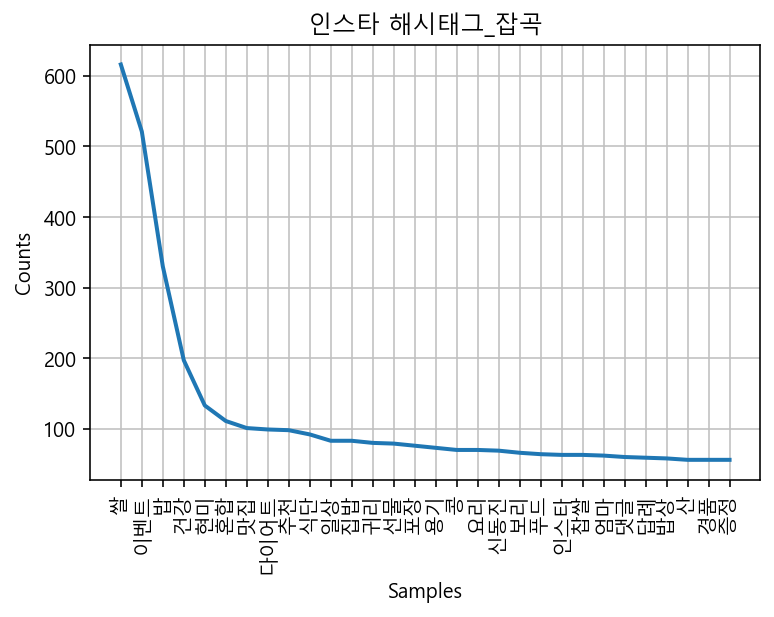

In [69]:
bab = nltk.Text(ex_list)
plt.figure()
plt.title('인스타 해시태그_잡곡')
bab.plot(30)
plt.show()

### 워드클라우드

In [62]:
import wordcloud

#이미지 불러와서 사용할 것
from PIL import Image  

# 시각화시 글자 선명하게 출력하기 위함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

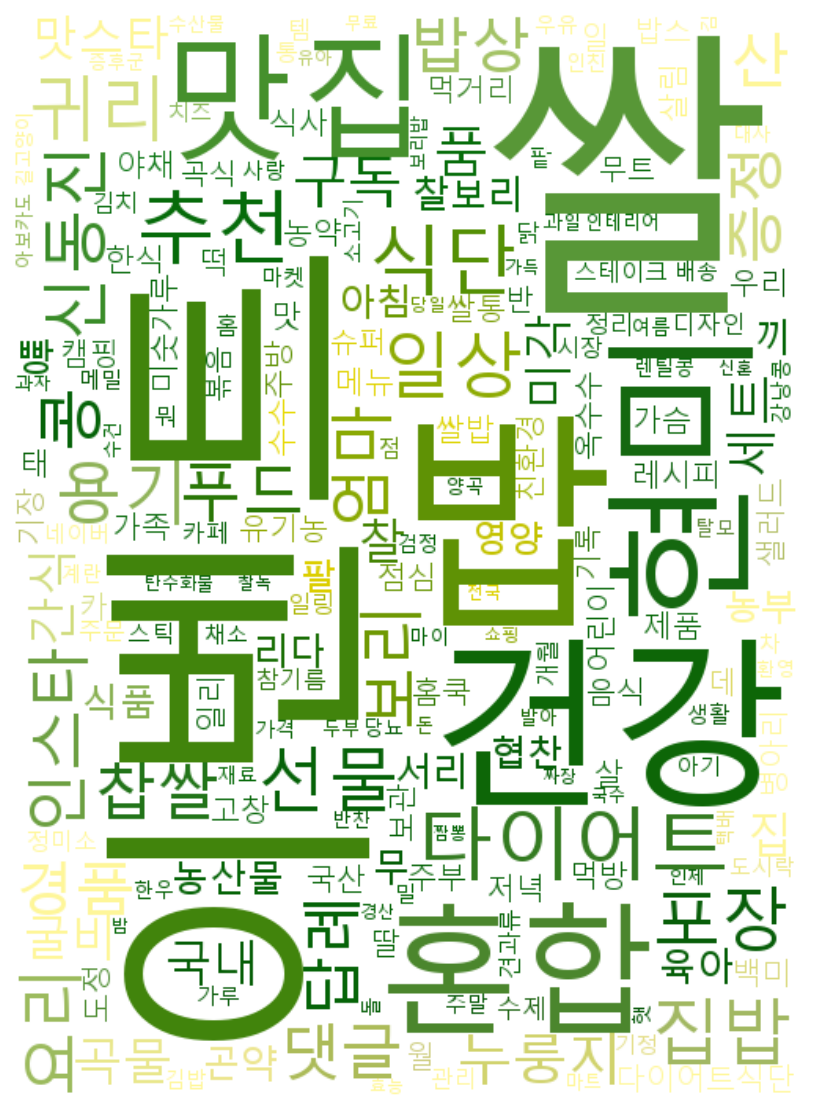

<Figure size 432x288 with 0 Axes>

In [63]:
# 특정이미지1 이용 워드클라우드 생성
img = np.array(Image.open('image/잘살아보세.png'))
image_color = wordcloud.ImageColorGenerator(img) #이미지의 color 이용
cloud_image = wordcloud.WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                                    background_color="white", mask=img).generate_from_frequencies(words)

plt.figure(figsize=(10, 10))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()
plt.savefig("인스타_집밥_워드클라우드.png") #이미지 파일로 저장